In [2]:
library(spacexr)
library(Matrix)

In [15]:
cellr1 <- read.csv('/data2/duren_lab/idebnat/palmetto/Modest/Chrom_spatial/data/p21lab_train.csv')
cellr2 <- read.csv('/data2/duren_lab/idebnat/palmetto/Modest/Chrom_spatial/data/p21lab_test.csv')
# cellr1 <- subset(cellr1, cellr1$RNA_clusters!='R3')

In [16]:
r1counts <- read.csv("/data2/duren_lab/idebnat/palmetto/Modest/Chrom_spatial/data/p21rna_train.csv")
r2counts <- read.csv("/data2/duren_lab/idebnat/palmetto/Modest/Chrom_spatial/data/p21rna_test.csv")

rownames(r1counts) <- r1counts[,1]
r1counts[,1] <- NULL
rownames(r2counts) <- r2counts[,1]
r2counts[,1] <- NULL

r1counts <- r1counts[,colnames(r1counts) %in% cellr1$barcode]

In [17]:
cellr2<- cellr2[,1:2]
cellr1<- cellr1[,1:2]

In [18]:
ctr1 <- cellr1$RNA_clusters
names(ctr1) <- cellr1$barcode # create cell_types named list
ctr1 <- as.factor(ctr1) # convert to factor data type

ctr2 <- cellr2$RNA_clusters
names(ctr2) <- cellr2$barcode # create cell_types named list
ctr2 <- as.factor(ctr2) # convert to factor data type

In [19]:
# reference <- Reference(r1counts, ctr1)
reference <- Reference(r2counts, ctr2)

In [20]:
print(dim(reference@counts)) #observe Digital Gene Expression matrix
#> [1] 384 475
table(reference@cell_types) 

[1] 3952 1187



 R0  R1  R2  R3  R4  R5  R6  R7  R8 
292 111  78 282 139  91  89  52  53 

[1] 3952 1186


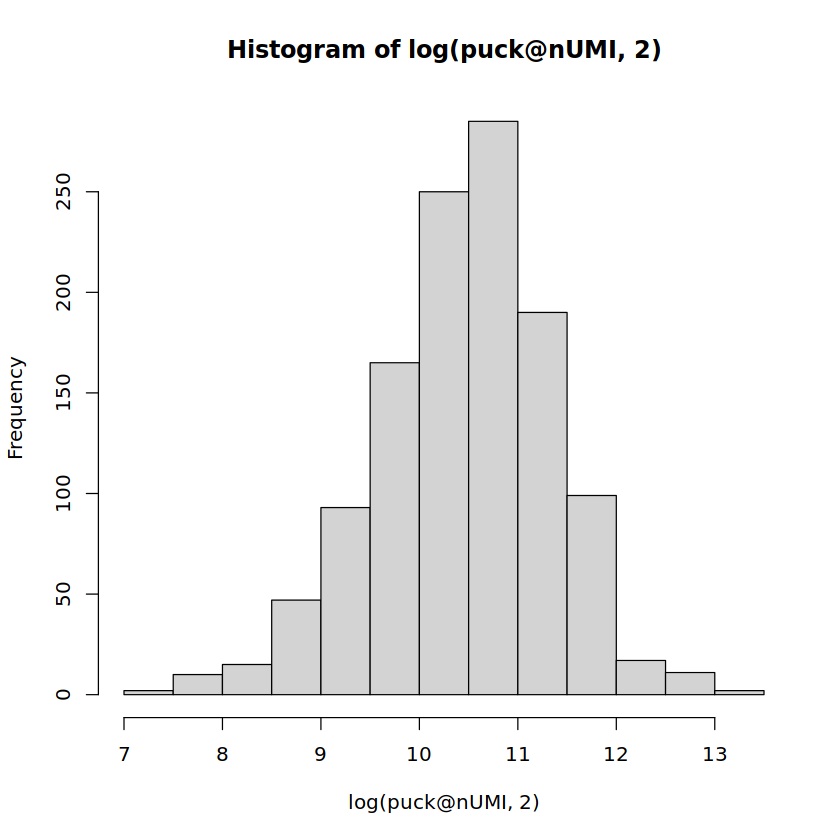

In [21]:
# coords <- read.csv("/data2/duren_lab/idebnat/palmetto/Modest/Chrom_spatial/data/spcoord.csv")
coords <- read.csv("/data2/duren_lab/idebnat/palmetto/Modest/Chrom_spatial/data/spcoord_tr.csv")
rownames(coords) <- coords$SpotID
coords$SpotID <- NULL # Move barcodes to rownames
### Create SpatialRNA object
puck <- SpatialRNA(coords, r1counts)

## Examine SpatialRNA object (optional)
print(dim(puck@counts)) # observe Digital Gene Expression matrix
hist(log(puck@nUMI,2)) # histogram of log_2 nUMI

In [22]:
myRCTD <- create.RCTD(puck, reference, max_cores = 8, CELL_MIN_INSTANCE=8)

Begin: process_cell_type_info

process_cell_type_info: number of cells in reference: 1187

process_cell_type_info: number of genes in reference: 3952




 R0  R1  R2  R3  R4  R5  R6  R7  R8 
292 111  78 282 139  91  89  52  53 


End: process_cell_type_info

create.RCTD: getting regression differentially expressed genes: 

get_de_genes: R0 found DE genes: 20

get_de_genes: R1 found DE genes: 169

get_de_genes: R2 found DE genes: 135

get_de_genes: R3 found DE genes: 117

get_de_genes: R4 found DE genes: 163

get_de_genes: R5 found DE genes: 58

get_de_genes: R6 found DE genes: 142

get_de_genes: R7 found DE genes: 185

get_de_genes: R8 found DE genes: 200

get_de_genes: total DE genes: 1087

create.RCTD: getting platform effect normalization differentially expressed genes: 

get_de_genes: R0 found DE genes: 161

get_de_genes: R1 found DE genes: 413

get_de_genes: R2 found DE genes: 491

get_de_genes: R3 found DE genes: 404

get_de_genes: R4 found DE genes: 396

get_de_genes: R5 found DE genes: 223

get_de_genes: R6 found DE genes: 307

get_de_genes: R7 found DE genes: 553

get_de_genes: R8 found DE genes: 560

get_de_genes: total DE genes: 2622



In [23]:
myRCTD <- run.RCTD(myRCTD, doublet_mode = 'doublet')

fitBulk: decomposing bulk

chooseSigma: using initial Q_mat with sigma =  1

Likelihood value: 711211.938121025

Sigma value:  1.16

Likelihood value: 709157.514213119

Sigma value:  1.18

Likelihood value: 709088.408194846

Sigma value:  1.2

Likelihood value: 709057.765179392

Sigma value:  1.2



[1] "gather_results: finished 1000"


In [24]:
results <- myRCTD@results
# normalize the cell type proportions to sum to 1.
norm_weights = normalize_weights(results$weights) 
cell_type_names <- myRCTD@cell_type_info$info[[2]] #list of cell type names
spatialRNA <- myRCTD@spatialRNA
resultsdir <- '/data2/duren_lab/idebnat/palmetto/Modest/Chrom_spatial/Bench_methods/RCTD' ## you may change this to a more accessible directory on your computer.
dir.create(resultsdir)

Warning message in dir.create(resultsdir):
“'/data2/duren_lab/idebnat/palmetto/Modest/Chrom_spatial/Bench_methods/RCTD' already exists”


png 
  2

png 
  2

png 
  2

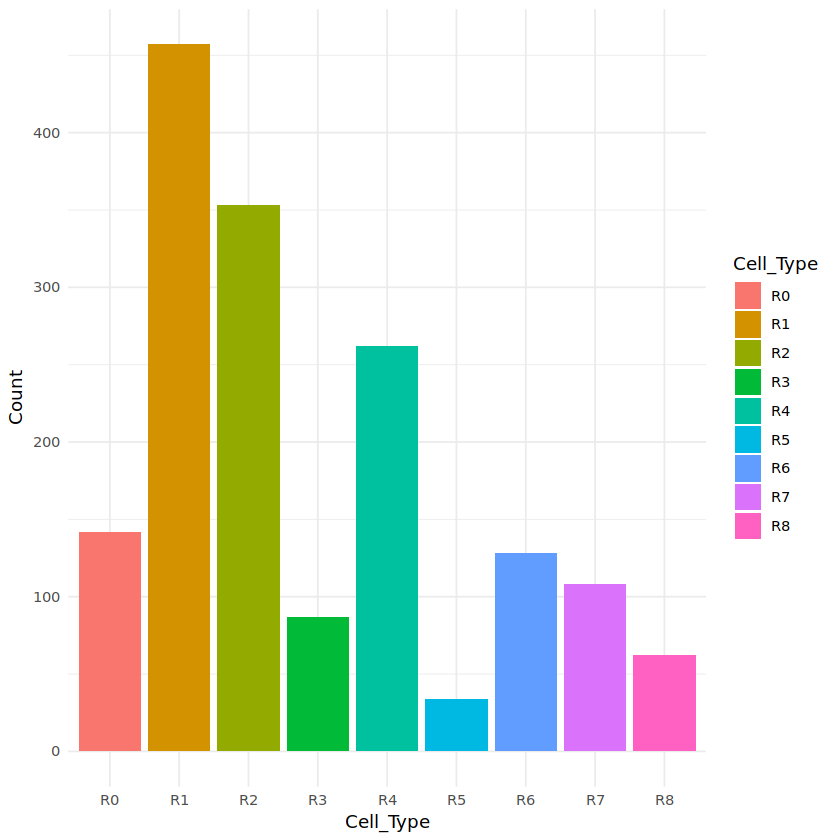

In [25]:
plot_weights(cell_type_names, spatialRNA, resultsdir, norm_weights) 
plot_weights_unthreshold(cell_type_names, spatialRNA, resultsdir, norm_weights) 
plot_weights_doublet(cell_type_names, spatialRNA, resultsdir, results$weights_doublet, 
                     results$results_df) 
plot_cond_occur(cell_type_names, resultsdir, norm_weights, spatialRNA)

In [ ]:
plot_weights(cell_type_names, spatialRNA, resultsdir, norm_weights) 
# Plots all weights for each cell type as in full_mode. (saved as 
# 'results/cell_type_weights.pdf')
plot_weights_unthreshold(cell_type_names, spatialRNA, resultsdir, norm_weights) 
# Plots the weights for each cell type as in doublet_mode. (saved as 
# 'results/cell_type_weights_doublets.pdf')
plot_weights_doublet(cell_type_names, spatialRNA, resultsdir, results$weights_doublet, 
                     results$results_df) 
# Plots the number of confident pixels of each cell type in 'full_mode'. (saved as 
# 'results/cell_type_occur.pdf')
plot_cond_occur(cell_type_names, resultsdir, norm_weights, spatialRNA)


In [ ]:
plot_all_cell_types(results$results_df, spatialRNA@coords, cell_type_names, resultsdir) 

In [ ]:
doublets <- results$results_df[results$results_df$spot_class == "doublet_certain",] 
# Plots all doublets in space (saved as 
# 'results/all_doublets.pdf')
plot_doublets(spatialRNA, doublets, resultsdir, cell_type_names) 

In [ ]:
plot_doublets_type(spatialRNA, doublets, resultsdir, cell_type_names) 
# a table of frequency of doublet pairs 
doub_occur <- table(doublets$second_type, doublets$first_type) 
# Plots a stacked bar plot of doublet ocurrences (saved as 
# 'results/doublet_stacked_bar.pdf')

plot_doub_occur_stack(doub_occur, resultsdir, cell_type_names) 

In [26]:
write.csv(as.matrix(norm_weights), '/data2/duren_lab/idebnat/palmetto/Modest/Chrom_spatial/Bench_methods/RCTD/weights2.csv')

In [ ]:
#cluster and then use cell labels for ALzheimers dataset
#get some figures for RCTD and cytospace
